Perceptron_from_scratch

In [1]:
import numpy as np

In [14]:
def unit_step_func(x):
  return np.where(x>0,1,0)

class Preceptron:

  def __init__(self,learning_rate =0.01,n_iters  = 1000):
    self.lr =  learning_rate
    self.n_iters = n_iters
    self.activation = unit_step_func
    self.weights =None
    self.bias = None

  def fit(self, X,y):
    n_samples,n_features = X.shape

    #init parameters

    self.weights  = np.zeros(n_features)
    self.bias = 0
    #learn weights
    y_ = np.where(y> 0, 1,0)
    for _ in range (self.n_iters):

      for idx,x_i in enumerate(X):
        linear_output  = np.dot(x_i, self.weights )+self.bias
        y_predicted = self.activation(linear_output)

        #preceptrin update rule
        update = self.lr *(y_[idx]- y_predicted)
        self.weights +=update * x_i
        self.bias +=update




  def predict(self, X):
    linear_output  = np.dot(X, self.weights )+self.bias
    y_predicted = self.activation(linear_output)
    return y_predicted

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [16]:
def accuracy (y_true ,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy




In [17]:
X,y = datasets.make_blobs(n_samples= 150 , n_features= 2, centers =2,cluster_std = 1.05,random_state = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size  = 0.2, random_state = 123)

In [19]:
p= Preceptron(learning_rate = 0.01, n_iters =1000)
p.fit(X_train,Y_train)
predictions =p.predict(X_test)

print("Accuracy of the perceptron",accuracy(Y_test, predictions))



Accuracy of the perceptron 1.0


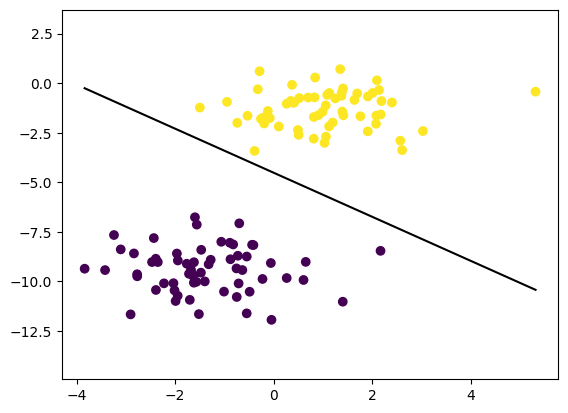

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0],X_train[:,1], marker = "o",c = Y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1= (-p.weights[0]*x0_1 - p.bias)/p.weights[1]
x1_2 = (-p.weights[0]*x0_2 - p.bias)/p.weights[1]

ax.plot([x0_1, x0_2],[x1_1,x1_2],"k")

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin - 3, ymax + 3 ])
plt.show()